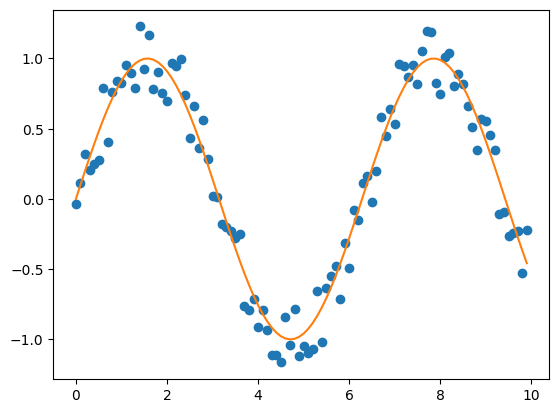

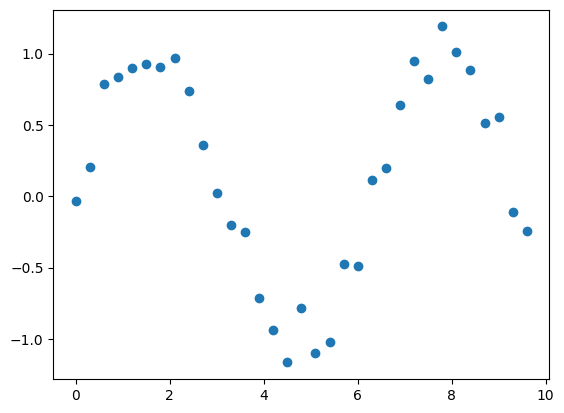

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x=np.array(range(0,100,1))/10
y=np.sin(x)+(np.random.random(np.shape(x))-0.5)/2
plt.plot(x, y,'o')
plt.plot(x,np.sin(x))
plt.show()
x1=x[0:-1:3]
y1=y[0:-1:3]
plt.figure()
plt.plot(x1, y1,'o')
plt.show()

-0.026006881499014797
0.14977615602048738


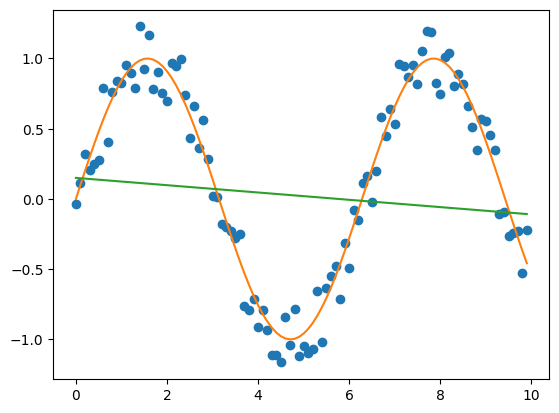

In [2]:
def grad_des_linear(x,y,w0,b0,lambdaa,num_epoch):
  w=w0
  b=b0
  counterr1=1
  while(counterr1<num_epoch):
    counterr1=counterr1+1
    Yb =  w*x+b
    N = (-2.0)/np.size(x)
    w = w - lambdaa * N *  np.sum(x * (y-Yb))
    b = b - lambdaa * N *  np.sum(y-Yb)
  return w,b
w,b = grad_des_linear(x,y,-1,0,0.005,10)
print(w)
print(b)
plt.figure()
plt.plot(x, y,'o')
plt.plot(x,np.sin(x))
plt.plot(x, w*x+b)
plt.show()

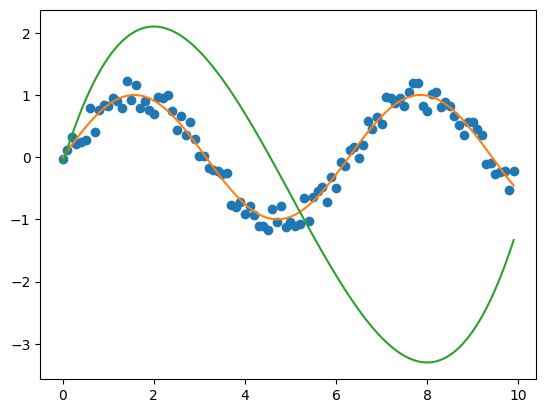

In [3]:
w3=+0.05
w2=-15*w3
w1=48*w3
w0=-0.1
plt.figure()
plt.plot(x, y,'o')
plt.plot(x,np.sin(x))
plt.plot(x,w3*np.power(x,3)+w2*np.power(x,2)+w1*x+w0)
plt.show()

[98802.71902305259, 11589.396903961764, 1401.1073253814964, -0.09993999999999999]


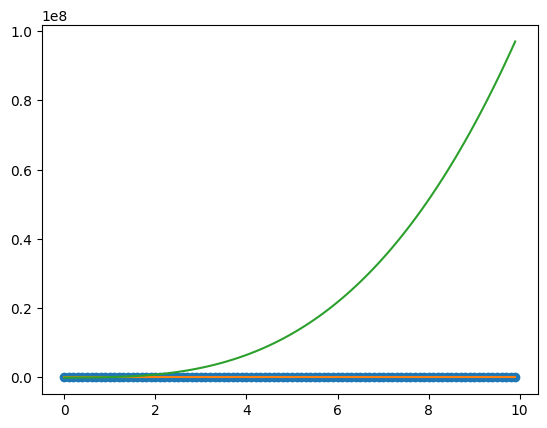

In [5]:
def grad_des_3_deg(x,y,w03,w02,w01,w00,lambdaa,num_epoch):
  w3=w03
  w2=w02
  w1=w01
  w0=w00
  counterr1=1
  while(counterr1<num_epoch):
    counterr1=counterr1+1
    Yb =  w3*np.power(x,3)+w2*np.power(x,2)+w1*x+w0
    N = (-2.0)/np.size(x)
    w3 = w3 - lambdaa * N *  np.sum(np.power(x,3)* (y-Yb))
    w2 = w2 - lambdaa * N *  np.sum(np.power(x,2)* (y-Yb))
    w1 = w1 - lambdaa * N *  np.sum(x*(y-Yb))
    w0 = w0 - lambdaa * N
  return w3,w2,w1,w0
w3=+0.05
w2=-15*w3
w1=48*w3
w0=-0.1
w3,w2,w1,w0 = grad_des_3_deg(x,y,w3,w2,w1,w0,0.001,4)
print([w3,w2,w1,w0])
plt.figure()
plt.plot(x, y,'o')
plt.plot(x,np.sin(x))

plt.plot(x,w3*np.power(x,3)+w2*np.power(x,2)+w1*x+w0)
plt.show()

پارامترهای مدل:
[[ 1.06016049]
 [-0.72762777]
 [ 2.27326592]
 [ 0.66335619]
 [ 0.51420375]
 [-0.02060549]]


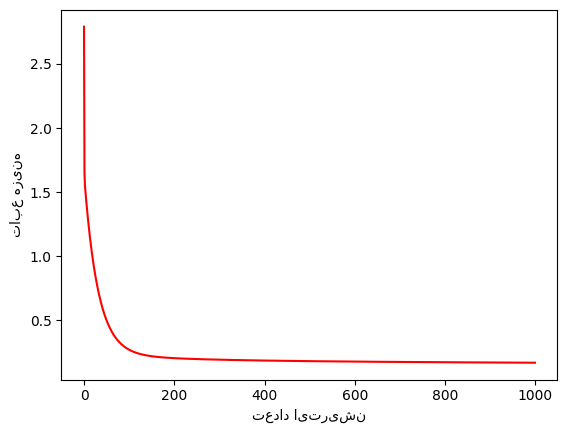

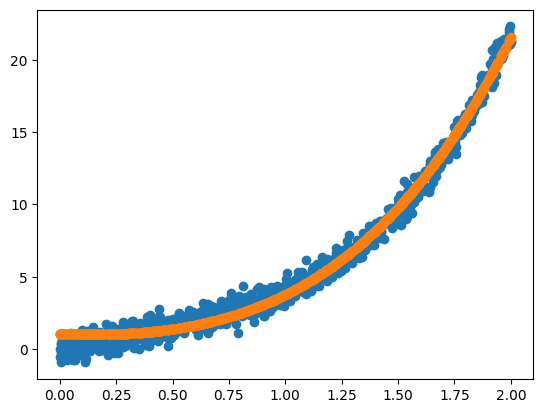

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# تابع هزینه (Mean Squared Error)
def cost_function(X, y, theta):
    m = len(y)
    J = (1/(2*m)) * np.sum((X.dot(theta) - y)**2)
    return J

# گرادیان تابع هزینه
def gradient(X, y, theta):
    m = len(y)
    grad = (1/m) * X.T.dot(X.dot(theta) - y)
    return grad

# گرادیان نزولی
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        theta = theta - learning_rate * gradient(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)

    return theta, cost_history

# تولید داده‌های آموزشی
N_samples=1000
# np.random.seed(0)
X = 2 * np.random.rand(N_samples, 1)
# y = 4 + 3 * X + 0.5*np.random.randn(N_samples, 1)
y = X**4 + 3 * X + 0.5*np.random.randn(N_samples, 1)

# X=np.reshape(np.array(range(0,N_samples,1))/10,(N_samples,1))
# y = 4 + 3 * X + 0.5*np.random.randn(N_samples, 1)



# اضافه کردن ستونی به ماتریس X برای تطبیق با توان های مختلف درجه
# X_b = np.c_[np.ones((N_samples, 1)), X, X**2, X**3]

# تعیین پارامترها و شروع گرادیان نزولی
# theta = np.random.randn(4, 1)
degree_model=5
X_b =np.ones((N_samples, 1))
for i in range(1,degree_model+1,1):
  X_b = np.c_[X_b, X**i]

theta = np.random.randn(degree_model+1, 1)
learning_rate = 0.01
iterations = 1000

# اجرای گرادیان نزولی
theta, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

# نمایش نتایج
print("پارامترهای مدل:")
print(theta)

# نمودار تغییرات تابع هزینه در طول گرادیان نزولی
plt.plot(range(iterations), cost_history, 'r')
plt.xlabel('تعداد ایتریشن')
plt.ylabel('تابع هزینه')
plt.show()

plt.figure()
plt.plot(X,y,'o')
plt.plot(X,X_b.dot(theta),'o')
